In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pystan

In [21]:
def plot_trend(x_axis, y_axis):
    plt.plot(x_axis, y_axis)
    plt.rcParams['figure.figsize'] = (10,5)
    z = np.polyfit(x_axis, y_axis, 1)
    trend = np.poly1d(z)
    plt.plot(x_axis, trend(x_axis), 'r--')
    plt.xticks(np.arange(2006, 2018, 1))
    plt.xlabel('year')
    plt.ylabel('deaths')
    plt.show()

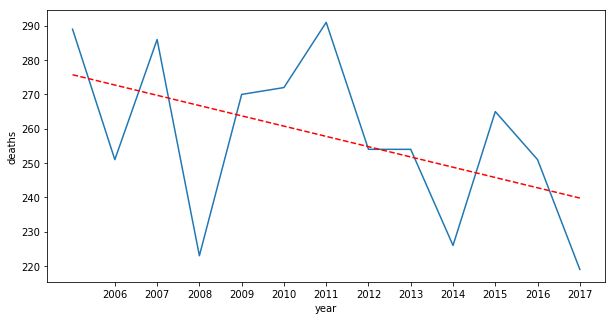

In [22]:
data = pd.read_csv('data/data.csv', sep = ',')
data['total']= data.iloc[:, 1:3].sum(axis=1)

year = data['year'].values
male = data['male'].values
female = data['female'].values
total = data['total'].values
prediction_year = 2018

plot_trend(year, total)

In [23]:
accidents_code = '''
data {
    int <lower=0> N;             //number of data points
    vector[N] year;              //observation year
    vector[N] number_of_deaths;  //total number of deaths
    real prediction_year;        //prediction year
}

parameters {
    real alpha;
    real beta;
    real <lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + (beta * year);
}

model {
    beta ~ normal(0, 22);
    number_of_deaths ~ normal(mu, sigma);
}

generated quantities {
    real ypred;
    ypred = normal_rng(alpha + (beta * prediction_year), sigma);
}
'''

accidents_data = {
    'N': len(data),
    'year': year,
    'number_of_deaths': total,
    'prediction_year': prediction_year
}

model = pystan.StanModel(model_code=accidents_code)
accidents_fit = model.sampling(data=accidents_data)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_185cd15b3b8ef48103538c27f8a82300 NOW.
/Users/maksaddonayorov/.virtualenvs/bda/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/qn/_rqylh917b33tgzrfm1wy79h0000gn/T/tmpz7sx2p4s/stanfit4anon_model_185cd15b3b8ef48103538c27f8a82300_7837239224458608198.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [24]:
summary = accidents_fit.summary()
summary = pd.DataFrame(
    summary['summary'], 
    columns=summary['summary_colnames'], 
    index=summary['summary_rownames']
)

summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
alpha,6072.144474,312.157483,4173.179506,-1953.005624,3505.152229,5990.080115,8473.599489,14737.489176,178.725546,1.012659
beta,-2.891211,0.155231,2.075226,-7.195264,-4.087183,-2.850352,-1.616019,1.099933,178.720880,1.012658
sigma,25.554477,0.310949,6.607593,16.501409,21.132523,24.329458,28.708049,41.844149,451.551057,1.012886
mu[1],275.265460,0.924264,14.392571,247.096881,266.255702,275.017368,284.006195,304.243184,242.485073,1.009716
mu[2],272.374248,0.769855,12.657514,247.439645,264.517677,272.231330,280.025213,297.716329,270.320622,1.008805
mu[3],269.483037,0.614343,11.040487,247.873432,262.691862,269.374343,276.165573,292.180574,322.964569,1.007532
mu[4],266.591825,0.456478,9.601310,247.739615,260.684120,266.511483,272.442495,286.330786,442.406402,1.005802
mu[5],263.700614,0.297764,8.431553,246.894465,258.553405,263.584323,268.834272,280.852568,801.809255,1.003672
mu[6],260.809402,0.160198,7.655726,245.565711,256.129281,260.681762,265.633868,276.617223,2283.799536,1.001641
mu[7],257.918191,0.123546,7.398805,243.230585,253.372491,257.764996,262.503269,273.291402,3586.465790,1.000722
